<h1 style="text-align: center; font-size: 3rem;">Primeiro passo para o tratamento de dados Gamaespectrométrico  </h1>

## Etapas 🐍
- Importar dados da área desejada
- Selecionar o poligono da área
- Plota-la para confirmação da mesma
- Aplicar os filtros desejados (_com operações matemática_)
- Por fim salvar o _Dataframe_ com as alterações



In [1]:
import pandas as pd
import pyproj
import pooch
import pandas as pd
import numpy as np
import xarray as xr
import verde as vd
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/1134_CDC_GamaLine.csv', sep='\s+')

C:\Users\agrog\AppData\Local\Temp\ipykernel_5448\2082561182.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/1134_CDC_GamaLine.csv', sep='\s+');


In [8]:
data.head()

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,CTB,KB,UB,...,Kperc,eU,eTh,THKRAZAO,UKRAZAO,UTHRAZAO,LONGITUDE,LATITUDE,DATA,HORA
0,554648,9059335,1062.0,525.00,506.25,107.07,417.93,544.0,48.0,20.0,...,0.102,-0.022,0.603,24.255,1.646,0.022,-56.503472,-8.509550,2015/07/18,17:55:34
1,554648,9059410,1063.0,525.85,506.25,105.38,420.47,532.0,48.0,25.0,...,0.075,0.011,0.560,24.255,1.646,0.022,-56.503467,-8.508872,2015/07/18,17:55:35
2,554649,9059484,1064.0,528.55,512.54,104.51,424.04,566.0,45.0,24.0,...,0.016,0.056,0.559,24.255,1.646,0.022,-56.503462,-8.508197,2015/07/18,17:55:36
3,554649,9059559,1065.0,530.46,511.64,106.61,423.85,535.0,33.0,20.0,...,-0.057,0.078,0.660,24.255,1.646,0.022,-56.503465,-8.507522,2015/07/18,17:55:37
4,554648,9059633,1066.0,532.30,514.34,108.81,423.49,584.0,36.0,30.0,...,-0.090,0.054,0.872,24.255,1.646,0.022,-56.503473,-8.506850,2015/07/18,17:55:38


#### Esta etapa é utilizada para recortar o local desejado

In [4]:
# Slice a smaller portion of the survey data to speed-up calculations for this
# example
region = [-55.3880,-55.3322,-7.651, -7.6077]
# Obtenha uma matriz com as coordenadas do conjunto de dados
# que estão dentro da região de corte: 
inside = vd.inside((data.LONGITUDE, data.LATITUDE), region)

# Obtenha um conjunto de dados menor e substitua-o no original:
data = data[inside]
print("Number of data points:", data.shape[0])
print("Mean height of observations:", data.ALTURA.mean())

Number of data points: 772
Mean height of observations: 108.41766839378239


In [5]:
# Coordenadas dos levantamentos
long_all = data.LONGITUDE
lat_all = data.LATITUDE
# Anomalia de Campo Total
act_all = data.THKRAZAO

In [6]:
data.ALTURA.max()

137.41

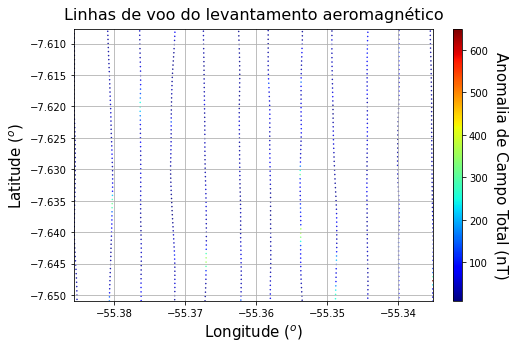

In [7]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

#### Agora é fazer as operções matemáticas para o parametro F ou outro parâmetro  (Ler o [_Artigo sobre Hidrotermalismo_](https://github.com/wendell8/Fontes-equivalentes/blob/main/Referencias/Hidrotermal%20e%20geof%C3%ADsica.pdf))

In [8]:
data

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,CTB,KB,UB,...,Kperc,eU,eTh,THKRAZAO,UKRAZAO,UTHRAZAO,LONGITUDE,LATITUDE,DATA,HORA
423378,678091,9158733,6200.0,358.20,331.08,132.40,225.80,2335.0,161.0,97.0,...,0.656,1.359,12.682,19.346,2.073,0.107,-55.385630,-7.607750,2015/09/03,13:44:34
423379,678091,9158658,6201.0,356.06,329.32,129.25,226.81,2361.0,148.0,101.0,...,0.704,1.300,12.684,18.017,1.847,0.102,-55.385628,-7.608433,2015/09/03,13:44:35
423380,678091,9158582,6202.0,353.86,327.56,127.66,226.20,2390.0,157.0,84.0,...,0.709,1.247,12.525,17.659,1.758,0.100,-55.385622,-7.609118,2015/09/03,13:44:36
423381,678092,9158506,6203.0,351.60,324.04,121.21,230.39,2299.0,157.0,100.0,...,0.653,1.232,12.072,18.483,1.886,0.102,-55.385615,-7.609805,2015/09/03,13:44:37
423382,678092,9158430,6204.0,349.93,322.28,114.26,235.67,2397.0,161.0,99.0,...,0.521,1.156,11.483,22.034,2.218,0.101,-55.385608,-7.610493,2015/09/03,13:44:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457659,683633,9158383,4344.0,342.59,380.51,113.90,228.69,1558.0,88.0,43.0,...,0.399,1.076,10.171,25.479,2.696,0.106,-55.335393,-7.610725,2015/09/09,19:04:55
457660,683632,9158458,4345.0,342.16,380.51,113.85,228.31,1595.0,100.0,57.0,...,0.379,1.177,10.335,27.253,3.103,0.114,-55.335408,-7.610048,2015/09/09,19:04:56
457661,683631,9158533,4346.0,341.46,379.63,108.79,232.67,1578.0,114.0,68.0,...,0.427,1.188,10.507,24.591,2.780,0.113,-55.335417,-7.609373,2015/09/09,19:04:57
457662,683631,9158608,4347.0,340.77,378.74,104.22,236.55,1544.0,127.0,48.0,...,0.419,1.151,10.627,25.351,2.745,0.108,-55.335422,-7.608697,2015/09/09,19:04:58


### Salvando o enquadramento com todas as informações sem fazer o Parâmetro F

In [9]:
data.to_csv('data_NP.XYZ', index=False)

### Aqui lemos o arquivo recém salvados e faremos as parametrizações desejadas

In [10]:
dataNP=pd.read_csv('data_NP.XYZ')

In [11]:
Prt_F = dataNP.Kperc * (dataNP.eU/dataNP.eTh)

In [12]:
# Introduz uma coluna com a alteração feita, no dataframe
Parametro = dataNP.assign(Parametr_F = Prt_F)

In [13]:
Parametro.head()

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,CTB,KB,UB,...,eU,eTh,THKRAZAO,UKRAZAO,UTHRAZAO,LONGITUDE,LATITUDE,DATA,HORA,Parametr_F
0,678091,9158733,6200.0,358.20,331.08,132.40,225.80,2335.0,161.0,97.0,...,1.359,12.682,19.346,2.073,0.107,-55.385630,-7.607750,2015/09/03,13:44:34,0.070297
1,678091,9158658,6201.0,356.06,329.32,129.25,226.81,2361.0,148.0,101.0,...,1.300,12.684,18.017,1.847,0.102,-55.385628,-7.608433,2015/09/03,13:44:35,0.072154
2,678091,9158582,6202.0,353.86,327.56,127.66,226.20,2390.0,157.0,84.0,...,1.247,12.525,17.659,1.758,0.100,-55.385622,-7.609118,2015/09/03,13:44:36,0.070589
3,678092,9158506,6203.0,351.60,324.04,121.21,230.39,2299.0,157.0,100.0,...,1.232,12.072,18.483,1.886,0.102,-55.385615,-7.609805,2015/09/03,13:44:37,0.066641
4,678092,9158430,6204.0,349.93,322.28,114.26,235.67,2397.0,161.0,99.0,...,1.156,11.483,22.034,2.218,0.101,-55.385608,-7.610493,2015/09/03,13:44:38,0.052449


In [14]:
# Salva sem o indice para não atrapalhar no Oasis
Parametro.to_csv('data_NP_WF.XYZ', index=False)

In [15]:
ParametroF = pd.read_csv('data_NP_WF.XYZ')
ParametroF.head()

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,CTB,KB,UB,...,eU,eTh,THKRAZAO,UKRAZAO,UTHRAZAO,LONGITUDE,LATITUDE,DATA,HORA,Parametr_F
0,678091,9158733,6200.0,358.20,331.08,132.40,225.80,2335.0,161.0,97.0,...,1.359,12.682,19.346,2.073,0.107,-55.385630,-7.607750,2015/09/03,13:44:34,0.070297
1,678091,9158658,6201.0,356.06,329.32,129.25,226.81,2361.0,148.0,101.0,...,1.300,12.684,18.017,1.847,0.102,-55.385628,-7.608433,2015/09/03,13:44:35,0.072154
2,678091,9158582,6202.0,353.86,327.56,127.66,226.20,2390.0,157.0,84.0,...,1.247,12.525,17.659,1.758,0.100,-55.385622,-7.609118,2015/09/03,13:44:36,0.070589
3,678092,9158506,6203.0,351.60,324.04,121.21,230.39,2299.0,157.0,100.0,...,1.232,12.072,18.483,1.886,0.102,-55.385615,-7.609805,2015/09/03,13:44:37,0.066641
4,678092,9158430,6204.0,349.93,322.28,114.26,235.67,2397.0,161.0,99.0,...,1.156,11.483,22.034,2.218,0.101,-55.385608,-7.610493,2015/09/03,13:44:38,0.052449
